In [17]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
import pydotplus
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

In [65]:
pd.set_option('display.max_rows', None)  # Ï†ÑÏ≤¥ Ìñâ Ï∂úÎ†•
#pd.options.display.max_rows = 60

## 1. Ï†ÑÏ≤òÎ¶¨ Î∞è train set, test set ÏÉùÏÑ±

In [3]:
# train setÏúºÎ°ú Ïì∞Ïùº Ïãú,ÎèÑÎ≥Ñ + Í≤ΩÍ∏∞ÎèÑ Îç∞Ïù¥ÌÑ∞ ÏÖã

sido = pd.read_csv("./final_dataset/ÏßÄÏó≠Î™Ö_ÏÇ¨ÎßùÏûêÏàò(train).csv")
sido = sido.drop(columns=['Unnamed: 0'])
sido

ÏßÄÏó≠Î™Ö   Î≥ëÏõêÏàò   Í≤©Î¶¨Î≥ëÏÉÅÏàò  ÎÇ®ÏùÄ Í≤©Î¶¨Î≥ëÏÉÅÏàò        Ï¥ùÏù∏Íµ¨  ÏöîÏñëÍ∏∞Í¥ÄÏàò  60ÏÑ∏ Ïù¥ÏÉÅ - Í≥Ñ  60~64ÏÑ∏  \
0       Í∞ïÏõêÎèÑ  18.0   539.0      75.0  1347375.0   34.0      369970  116558   
1      Í≤ΩÏÉÅÎÇ®ÎèÑ  35.0   940.0     176.0  3295942.0  129.0      774696  253193   
2      Í≤ΩÏÉÅÎ∂ÅÎèÑ  29.0  1046.0     271.0  2583157.0  111.0      719154  213011   
3     Í¥ëÏ£ºÍ¥ëÏó≠Ïãú  19.0   240.0      55.0  1477573.0   60.0      290547   96662   
4     ÎåÄÍµ¨Í¥ëÏó≠Ïãú  18.0   876.0     249.0  2410700.0   75.0      559877  182705   
5     ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú  10.0   325.0      80.0  1488435.0   47.0      299964  102881   
6     Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú  28.0   679.0     188.0  3212282.0  169.0      869020  278378   
7     ÏÑúÏö∏ÌäπÎ≥ÑÏãú  47.0  2150.0     361.0  9231569.0  125.0     2045748  654912   
8   ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú   2.0    32.0       9.0   353933.0    5.0       48720   16969   
9     Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú   7.0   229.0      49.0  1135423.0   40.0      218134   84906   
10    Ïù∏Ï≤úÍ¥ëÏó≠Ïãú  17.0   993.0     197.0  2864877.0   68.0      571870  208179   
11     Ï†ÑÎùºÎÇ®ÎèÑ  35.0   497.0     124.0  1740538.0   83.0      517976  139367   
12     Ï†ÑÎùºÎ∂ÅÎèÑ  17.0   568.0     137.0  1735829.0   84.0      463566  131944   
13  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ   5.0   170.0      42.0   492306.0   10.0       96682   31190   
14     Ï∂©Ï≤≠ÎÇ®ÎèÑ  16.0   585.0      57.0  2098798.0   67.0      496840  144876   
15     Ï∂©Ï≤≠Î∂ÅÎèÑ  14.0   696.0     100.0  1593995.0   41.0      374360  119893   
16   Í≤ΩÍ∏∞ÎèÑÍ∞ÄÌèâÍµ∞   0.0     0.0       0.0    60233.0    4.0       20727    6227   
17   Í≤ΩÍ∏∞ÎèÑÍ≥†ÏñëÏãú   6.0   303.0      76.0  1045497.0   30.0      206667   71951   
18   Í≤ΩÍ∏∞ÎèÑÍ¥ëÎ™ÖÏãú   2.0    53.0       3.0   298116.0    5.0       61136   21771   
19   Í≤ΩÍ∏∞ÎèÑÍ¥ëÏ£ºÏãú   1.0    47.0       1.0   385141.0    6.0       75227   27399   
20   Í≤ΩÍ∏∞ÎèÑÍµ¨Î¶¨Ïãú   1.0    26.0       5.0   192051.0    4.0       39356   14167   
21   Í≤ΩÍ∏∞ÎèÑÍµ∞Ìè¨Ïãú   2.0    45.0      13.0   275571.0    7.0       54274   20161   
22   Í≤ΩÍ∏∞ÎèÑÍπÄÌè¨Ïãú   2.0   183.0      11.0   474546.0    6.0       81981   27553   
23  Í≤ΩÍ∏∞ÎèÑÎÇ®ÏñëÏ£ºÏãú   3.0    72.0      10.0   696033.0   16.0      139890   46476   
24  Í≤ΩÍ∏∞ÎèÑÎèôÎëêÏ≤úÏãú   0.0     0.0       0.0    95239.0    8.0       24519    7188   
25   Í≤ΩÍ∏∞ÎèÑÎ∂ÄÏ≤úÏãú   4.0    61.0      26.0   833148.0   23.0      170072   65734   
26   Í≤ΩÍ∏∞ÎèÑÏÑ±ÎÇ®Ïãú   6.0   153.0      49.0   922025.0   16.0      189747   65252   
27   Í≤ΩÍ∏∞ÎèÑÏàòÏõêÏãú   6.0   159.0      56.0  1210150.0   21.0      195000   71541   
28   Í≤ΩÍ∏∞ÎèÑÏãúÌù•Ïãú   3.0    75.0      13.0   535147.0   12.0       71949   28892   
29   Í≤ΩÍ∏∞ÎèÑÏïàÏÇ∞Ïãú   4.0    83.0      20.0   717345.0   17.0      110666   44151   
30   Í≤ΩÍ∏∞ÎèÑÏïàÏÑ±Ïãú   2.0     7.0       3.0   203030.0    9.0       43950   13887   
31   Í≤ΩÍ∏∞ÎèÑÏïàÏñëÏãú   2.0    28.0      14.0   542336.0    7.0      112997   41802   
32   Í≤ΩÍ∏∞ÎèÑÏñëÏ£ºÏãú   0.0     0.0       0.0   233286.0   12.0       49050   16144   
33   Í≤ΩÍ∏∞ÎèÑÏñëÌèâÍµ∞   1.0     0.0       0.0   113844.0    8.0       39331   11581   
34   Í≤ΩÍ∏∞ÎèÑÏó¨Ï£ºÏãú   1.0     8.0      11.0   113352.0    6.0       32029    9811   
35   Í≤ΩÍ∏∞ÎèÑÏó∞Ï≤úÍµ∞   1.0     1.0       0.0    42278.0    1.0       14575    4048   
36   Í≤ΩÍ∏∞ÎèÑÏò§ÏÇ∞Ïãú   1.0   100.0       9.0   240645.0    5.0       32612   11829   
37   Í≤ΩÍ∏∞ÎèÑÏö©Ïù∏Ïãú   4.0   342.0      88.0  1066975.0   23.0      193234   58579   
38   Í≤ΩÍ∏∞ÎèÑÏùòÏôïÏãú   0.0     0.0       0.0   160230.0    4.0       33625   12793   
39  Í≤ΩÍ∏∞ÎèÑÏùòÏ†ïÎ∂ÄÏãú   5.0    85.0      28.0   449572.0    8.0       97835   32728   
40   Í≤ΩÍ∏∞ÎèÑÏù¥Ï≤úÏãú   1.0    67.0       7.0   226212.0    6.0       43451   14662   
41   Í≤ΩÍ∏∞ÎèÑÌååÏ£ºÏãú   2.0     0.0       0.0   460541.0   22.0       87190   27910   
42   Í≤ΩÍ∏∞ÎèÑÌèâÌÉùÏãú   4.0    32.0      12.0   542522.0    9.0       91594   31220   
43   Í≤ΩÍ∏∞ÎèÑÌè¨Ï≤úÏãú   2.0    11.0       4.0   157939.0    5.0       4008

In [24]:
sido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   loc         46 non-null     object 
 1   cnt_hos     46 non-null     float64
 2   bed         46 non-null     float64
 3   remain_bed  46 non-null     float64
 4   pop         46 non-null     float64
 5   nurse       46 non-null     float64
 6   total60     46 non-null     int64  
 7   60-64       46 non-null     int64  
 8   65-69       46 non-null     int64  
 9   70-74       46 non-null     int64  
 10  75-79       46 non-null     int64  
 11  80-84       46 non-null     int64  
 12  85-         46 non-null     int64  
 13  conf        46 non-null     float64
 14  death       46 non-null     int64  
dtypes: float64(6), int64(8), object(1)
memory usage: 5.5+ KB


In [4]:
# ÏπºÎüºÎ™Ö Î≥ÄÍ≤Ω

columns = ['loc','cnt_hos','bed','remain_bed','pop','nurse','total60','60-64','65-69','70-74','75-79','80-84','85-','conf','death']
var_name = pd.DataFrame(sido.columns, columns, columns=['meaning'])
var_name

meaning
loc                ÏßÄÏó≠Î™Ö
cnt_hos            Î≥ëÏõêÏàò
bed              Í≤©Î¶¨Î≥ëÏÉÅÏàò
remain_bed    ÎÇ®ÏùÄ Í≤©Î¶¨Î≥ëÏÉÅÏàò
pop                Ï¥ùÏù∏Íµ¨
nurse            ÏöîÏñëÍ∏∞Í¥ÄÏàò
total60     60ÏÑ∏ Ïù¥ÏÉÅ - Í≥Ñ
60-64           60~64ÏÑ∏
65-69           65~69ÏÑ∏
70-74           70~74ÏÑ∏
75-79           75~79ÏÑ∏
80-84           80~84ÏÑ∏
85-              85ÏÑ∏Ïù¥ÏÉÅ
conf              ÌôïÏßÑÏûêÏàò
death             ÏÇ¨ÎßùÏûêÏàò

In [5]:
sido.columns = columns
sido.head()

loc  cnt_hos     bed  remain_bed        pop  nurse  total60   60-64  \
0    Í∞ïÏõêÎèÑ     18.0   539.0        75.0  1347375.0   34.0   369970  116558   
1   Í≤ΩÏÉÅÎÇ®ÎèÑ     35.0   940.0       176.0  3295942.0  129.0   774696  253193   
2   Í≤ΩÏÉÅÎ∂ÅÎèÑ     29.0  1046.0       271.0  2583157.0  111.0   719154  213011   
3  Í¥ëÏ£ºÍ¥ëÏó≠Ïãú     19.0   240.0        55.0  1477573.0   60.0   290547   96662   
4  ÎåÄÍµ¨Í¥ëÏó≠Ïãú     18.0   876.0       249.0  2410700.0   75.0   559877  182705   

    65-69   70-74   75-79  80-84    85-       conf  death  
0   81374   56864   53119  38211  23844   440985.0    746  
1  179622  128375   99667  70217  43622  1052389.0   1134  
2  162533  119640  100383  75400  48187   731978.0   1203  
3   65287   52134   38610  23826  14028   518968.0    520  
4  133421   95965   73211  47435  27140   734292.0   1243

### 1-1. outlier Ï†úÍ±∞ -> Ïïà ÌïòÍ≥† Ï†ïÍ∑úÌôîÎ°ú ÎåÄÏ≤¥

### 1-2. Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏãúÍ∞ÅÌôî

<AxesSubplot:>

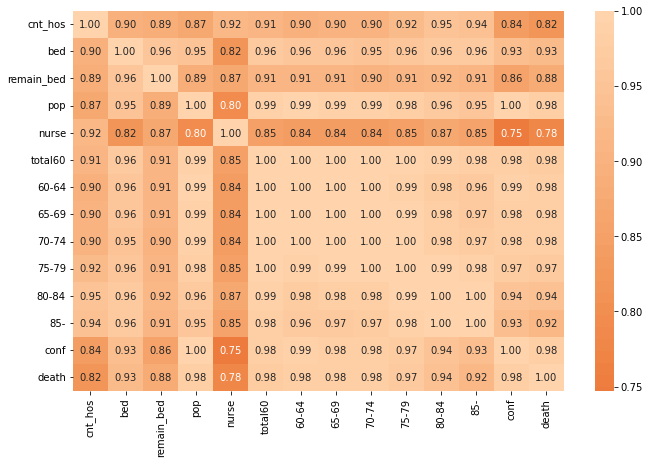

In [6]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌûàÌä∏Îßµ

import seaborn as sns
corr = sido.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,7)
sns.heatmap(corr, annot=True, fmt=".2f",center=0, ax=ax)

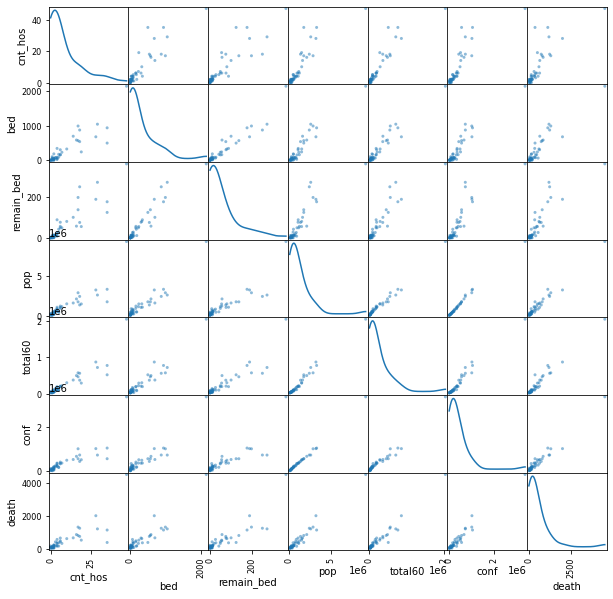

In [9]:
# ÏÇ∞Ï†êÎèÑ ÌñâÎ†¨ 
# Ï§ëÏöî Î≥ÄÏàòÎßå Í≥†Î•¥Í∏∞ - cnt_hos, bed, remain_bed, pop, total60, conf
from pandas.plotting import scatter_matrix, parallel_coordinates
axes = scatter_matrix(sido[['cnt_hos','bed','remain_bed','pop','total60','conf','death']], alpha = 0.5, figsize = (10,10), diagonal='kde')

In [35]:
# ÌïëÌÅ¨ÏÉâ ÏõåÎãù Î©îÏãúÏßÄ ÏóÜÏï†Í∏∞ „Öé

import warnings
warnings.filterwarnings(action='ignore')

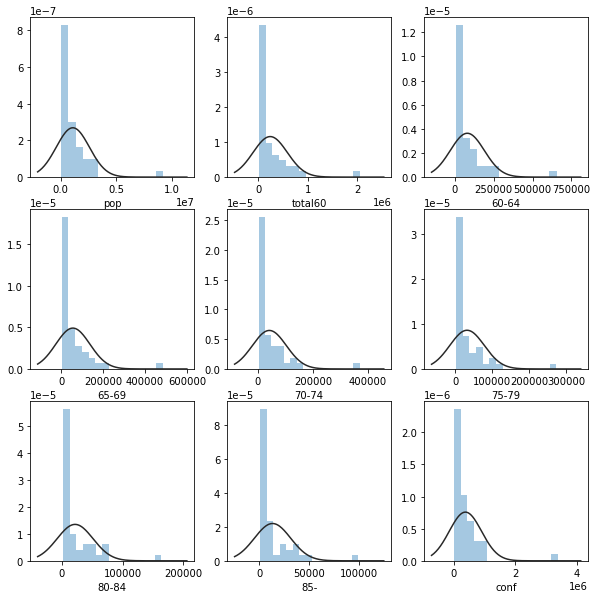

In [36]:
# Ïù∏Íµ¨Ïàò Î≥ÄÏàòÏùò Î∂ÑÌè¨ ÌôïÏù∏ - Ïä§ÏºÄÏùºÎßÅ Ï†Ñ

c1_name = [['pop','total60','60-64'],['65-69','70-74','75-79'],['80-84','85-','conf']]
fig, ax = plt.subplots(nrows = 3,ncols = 3)

for i in range(3): #Ìñâ
    for j in range(3): #Ïó¥
        sns.distplot(sido[c1_name[i][j]], kde=False, rug=False, fit =sp.stats.norm, ax = ax[i][j])

fig.set_size_inches(10,10)
plt.show()

### 1-3. Ïä§ÏºÄÏùºÎßÅ - Normalization ( MinMaxScaler ÏÇ¨Ïö© )

Ïù∏Íµ¨ Ïàò Î≥ÄÏàò (pop, total60, 60-64, 65-69, 70-74, 75-79, 80-84, 85-, conf,)Ïóê ÎåÄÌï¥ÏÑú NormalizationÏùÑ ÏßÑÌñâÌï¥Î≥¥Ïã§ÎûòÏöî?  
Îç∞Ïù¥ÌÑ∞Î•º 0~1 ÏÇ¨Ïù¥Î°ú Ï∂ïÏÜåÏãúÌÇ§ÎäîÎç∞ ÏõêÎûò Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Îäî ÏÜêÏã§ÎêòÏßÄ ÏïäÎäîÎã§Îäî ÌäπÏßïÏù¥ ÏûàÏäµÎãàÎã§.   
Í∑∏Î†áÍ≤å Ìï¥ÏÑú Ïù¥ÏÉÅÏπòÎûë Ï†ïÍ∑úÌôîÎ•º ÌïúÍ∫ºÎ≤àÏóê Ï≤òÎ¶¨ÌïòÎäîÍ≤å Ï¢ãÏùÑ Í≤É Í∞ôÎÑ§Ïöî  

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
# Ïù∏Íµ¨Ïàò Î≥ÄÏàòÏóê ÎåÄÌï¥ Ïä§ÏºÄÏùºÎßÅ ÏãúÌñâ
pop_col = ['pop','total60','60-64','65-69','70-74','75-79','80-84','85-','conf']
scaler = MinMaxScaler()
scaled_pop = pd.DataFrame(scaler.fit_transform(sido[pop_col]), columns = pop_col)
scaled_pop.head()

pop   total60     60-64     65-69     70-74     75-79     80-84  \
0  0.142024  0.174970  0.172863  0.162636  0.147814  0.188088  0.225187   
1  0.354071  0.374228  0.382791  0.366430  0.342466  0.360125  0.422676   
2  0.276504  0.346883  0.321055  0.330982  0.318689  0.362771  0.454657   
3  0.156192  0.135868  0.142294  0.129267  0.134939  0.134464  0.136427   
4  0.257737  0.268467  0.274492  0.270596  0.254246  0.262346  0.282103   

        85-      conf  
0  0.232070  0.126486  
1  0.433477  0.307492  
2  0.479964  0.212634  
3  0.132109  0.149573  
4  0.265634  0.213319

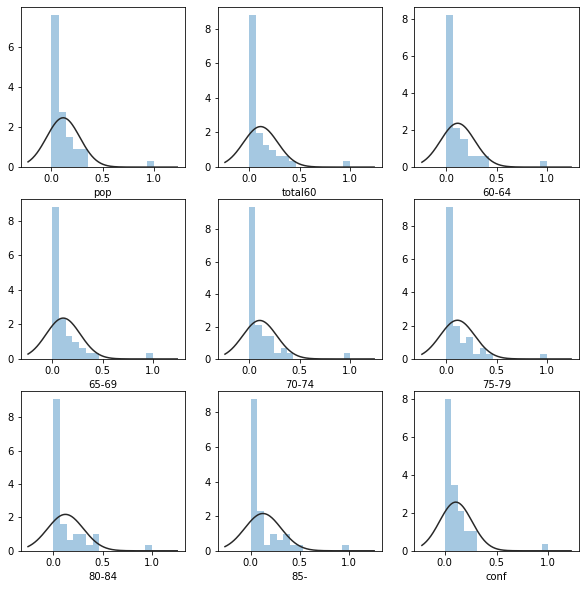

In [37]:
# Ïù∏Íµ¨Ïàò Î≥ÄÏàòÏùò Î∂ÑÌè¨ ÌôïÏù∏ - Ïä§ÏºÄÏùºÎßÅ ÌõÑ

c1_name = [['pop','total60','60-64'],['65-69','70-74','75-79'],['80-84','85-','conf']]
fig, ax = plt.subplots(nrows = 3,ncols = 3)

for i in range(3): #Ìñâ
    for j in range(3): #Ïó¥
        sns.distplot(scaled_pop[c1_name[i][j]], kde=False, rug=False, fit =sp.stats.norm, ax = ax[i][j])

fig.set_size_inches(10,10)
plt.show()

## Ïä§ÏºÄÏùºÎßÅ Ï†ÑÍ≥º ÎπÑÍµêÌïòÏó¨, Îç∞Ïù¥ÌÑ∞ Í∞íÏùò Î≤îÏúÑÎäî [0,1]Î°ú Ï∂ïÏÜåÎêêÏßÄÎßå Î∂ÑÌè¨Îäî ÎèôÏùºÌïú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

In [40]:
# Ïä§ÏºÄÏùºÎßÅ Îêú Ïù∏Íµ¨ Ïàò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÍ≥º (Ïù∏Íµ¨Ïàò Î≥ÄÏàò Ï†úÏô∏Îêú)ÏõêÎûò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ìï©ÏπòÍ∏∞ => Ïä§ÏºÄÏùºÎßÅÍπåÏßÄ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£åÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏôÑÏÑ± üòÜ‚ù§Ô∏è

sc_sido = pd.concat([sido.drop(columns = pop_col), scaled_pop], axis=1)
sc_sido

loc  cnt_hos     bed  remain_bed  nurse  death       pop   total60  \
0       Í∞ïÏõêÎèÑ     18.0   539.0        75.0   34.0    746  0.142024  0.174970   
1      Í≤ΩÏÉÅÎÇ®ÎèÑ     35.0   940.0       176.0  129.0   1134  0.354071  0.374228   
2      Í≤ΩÏÉÅÎ∂ÅÎèÑ     29.0  1046.0       271.0  111.0   1203  0.276504  0.346883   
3     Í¥ëÏ£ºÍ¥ëÏó≠Ïãú     19.0   240.0        55.0   60.0    520  0.156192  0.135868   
4     ÎåÄÍµ¨Í¥ëÏó≠Ïãú     18.0   876.0       249.0   75.0   1243  0.257737  0.268467   
5     ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú     10.0   325.0        80.0   47.0    612  0.157374  0.140505   
6     Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú     28.0   679.0       188.0  169.0   2002  0.344967  0.420666   
7     ÏÑúÏö∏ÌäπÎ≥ÑÏãú     47.0  2150.0       361.0  125.0   4504  1.000000  1.000000   
8   ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú      2.0    32.0         9.0    5.0     34  0.033915  0.016810   
9     Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú      7.0   229.0        49.0   40.0    322  0.118959  0.100217   
10    Ïù∏Ï≤úÍ¥ëÏó≠Ïãú     17.0   993.0       197.0   68.0   1312  0.307162  0.274371   
11     Ï†ÑÎùºÎÇ®ÎèÑ     35.0   497.0       124.0   83.0    379  0.184809  0.247838   
12     Ï†ÑÎùºÎ∂ÅÎèÑ     17.0   568.0       137.0   84.0    803  0.184296  0.221050   
13  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ      5.0   170.0        42.0   10.0    158  0.048973  0.040423   
14     Ï∂©Ï≤≠ÎÇ®ÎèÑ     16.0   585.0        57.0   67.0    859  0.223795  0.237432   
15     Ï∂©Ï≤≠Î∂ÅÎèÑ     14.0   696.0       100.0   41.0    660  0.168861  0.177132   
16   Í≤ΩÍ∏∞ÎèÑÍ∞ÄÌèâÍµ∞      0.0     0.0         0.0    4.0     16  0.001954  0.003029   
17   Í≤ΩÍ∏∞ÎèÑÍ≥†ÏñëÏãú      6.0   303.0        76.0   30.0    649  0.109173  0.094572   
18   Í≤ΩÍ∏∞ÎèÑÍ¥ëÎ™ÖÏãú      2.0    53.0         3.0    5.0    126  0.027841  0.022923   
19   Í≤ΩÍ∏∞ÎèÑÍ¥ëÏ£ºÏãú      1.0    47.0         1.0    6.0    123  0.037311  0.029861   
20   Í≤ΩÍ∏∞ÎèÑÍµ¨Î¶¨Ïãú      1.0    26.0         5.0    4.0    140  0.016299  0.012200   
21   Í≤ΩÍ∏∞ÎèÑÍµ∞Ìè¨Ïãú      2.0    45.0        13.0    7.0    185  0.025387  0.019545   
22   Í≤ΩÍ∏∞ÎèÑÍπÄÌè¨Ïãú      2.0   183.0        11.0    6.0    171  0.047040  0.033186   
23  Í≤ΩÍ∏∞ÎèÑÎÇ®ÏñëÏ£ºÏãú      3.0    72.0        10.0   16.0    417  0.071143  0.061696   
24  Í≤ΩÍ∏∞ÎèÑÎèôÎëêÏ≤úÏãú      0.0     0.0         0.0    8.0     95  0.005763  0.004896   
25   Í≤ΩÍ∏∞ÎèÑÎ∂ÄÏ≤úÏãú      4.0    61.0        26.0   23.0    563  0.086064  0.076555   
26   Í≤ΩÍ∏∞ÎèÑÏÑ±ÎÇ®Ïãú      6.0   153.0        49.0   16.0    414  0.095736  0.086242   
27   Í≤ΩÍ∏∞ÎèÑÏàòÏõêÏãú      6.0   159.0        56.0   21.0    477  0.127091  0.088828   
28   Í≤ΩÍ∏∞ÎèÑÏãúÌù•Ïãú      3.0    75.0        13.0   12.0    186  0.053635  0.028247   
29   Í≤ΩÍ∏∞ÎèÑÏïàÏÇ∞Ïãú      4.0    83.0        20.0   17.0    323  0.073462  0.047308   
30   Í≤ΩÍ∏∞ÎèÑÏïàÏÑ±Ïãú      2.0     7.0         3.0    9.0     59  0.017493  0.014462   
31   Í≤ΩÍ∏∞ÎèÑÏïàÏñëÏãú      2.0    28.0        14.0    7.0    234  0.054417  0.048456   
32   Í≤ΩÍ∏∞ÎèÑÏñëÏ£ºÏãú      0.0     0.0         0.0   12.0    168  0.020786  0.016973   
33   Í≤ΩÍ∏∞ÎèÑÏñëÌèâÍµ∞      1.0     0.0         0.0    8.0     72  0.007788  0.012188   
34   Í≤ΩÍ∏∞ÎèÑÏó¨Ï£ºÏãú      1.0     8.0        11.0    6.0     73  0.007734  0.008593   
35   Í≤ΩÍ∏∞ÎèÑÏó∞Ï≤úÍµ∞      1.0     1.0         0.0    1.0     20  0.000000  0.000000   
36   Í≤ΩÍ∏∞ÎèÑÏò§ÏÇ∞Ïãú      1.0   100.0         9.0    5.0     74  0.021587  0.008880   
37   Í≤ΩÍ∏∞ÎèÑÏö©Ïù∏Ïãú      4.0   342.0        88.0   23.0    359  0.111510  0.087959   
38   Í≤ΩÍ∏∞ÎèÑÏùòÏôïÏãú      0.0     0.0         0.0    4.0     56  0.012836  0.009379   
39  Í≤ΩÍ∏∞ÎèÑÏùòÏ†ïÎ∂ÄÏãú      5.0    85.0        28.0    8.0    358  0.044323  0.040991   
40   Í≤ΩÍ∏∞ÎèÑÏù¥Ï≤úÏãú      1.0    67.0         7.0    6.0     63  0.020016  0.014216   
41   Í≤ΩÍ∏∞ÎèÑÌååÏ£ºÏãú      2.0     0.0         0.0   22.0    208  0.045516  0.035750   
42   Í≤ΩÍ∏∞ÎèÑÌèâÌÉùÏãú      4.0    32.0        12.0    9.0    191  0.054438  0.037918   
43   Í≤ΩÍ∏∞ÎèÑÌè¨Ï≤úÏãú      2.0    11.0         4.0    5.0     79  0.012586  0.012558   
44  

### 1-4. Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨

In [54]:
x = sc_sido.drop(columns=['loc','death'])
y = sc_sido['death']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=1) # test
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.3, random_state=1) # train, valid

In [ ]:
# Ïù¥ÎØ∏ Î≥∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ïù∏Íµ¨ÏàòÍ∞Ä Î™®Îëê Ïä§ÏºÄÏùºÎßÅ ÎêòÏñ¥ÏûáÎäîÍ±∞ÎãàÍπå
# train, valid, test ÏÑ∏Ìä∏Ïóê ÎåÄÌï¥ÏÑúÎäî Îî±Ìûà Ïä§ÏºÄÏùºÎßÅ Ìï† ÌïÑÏöî ÏóÜÏùå (Ïù¥ÎØ∏ ÎêòÏñ¥ÏûàÎäîÍ±∞ÏûÑ)
# ÎßàÏßÄÎßâÏóê predict Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Ïùò Ïù∏Íµ¨ÏàòÏóê ÎåÄÌï¥ÏÑúÎßå >> transform << Îßå Ìï¥Ï£ºÎ©¥ Îê®!! (fit_transform ÎÖ∏ÎÖ∏ÎÖ∏)

## 2. Î™®Îç∏ fit, ÏÑ±Îä• ÌôïÏù∏ 

### 2-1. Î™®Îç∏ Ï†ÅÏö©

In [43]:
rf = RandomForestRegressor(n_estimators=500, random_state=1) # n_estimators=500
rf.fit(train_x, train_y)

RandomForestRegressor(n_estimators=500, random_state=1)

### 2-2. Î≥ÄÏàò Ï§ëÏöîÎèÑ ÌôïÏù∏ 

In [44]:
# variable (feature) importance plot

importances = rf.feature_importances_
# rf.estimators_ : random forestÎ°ú Íµ¨Ìïú ÎÇòÎ¨¥ Î™®Îç∏ 500Í∞ú. 
df = pd.DataFrame({'Feature':train_x.columns, 'importance':importances})
df = df.sort_values('importance')
print(df)

       Feature  importance
9        75-79    0.032349
8        70-74    0.037282
10       80-84    0.043570
12        conf    0.052223
0      cnt_hos    0.054904
11         85-    0.057783
4          pop    0.058378
3        nurse    0.066224
7        65-69    0.073913
5      total60    0.092337
2   remain_bed    0.096370
6        60-64    0.097068
1          bed    0.237601


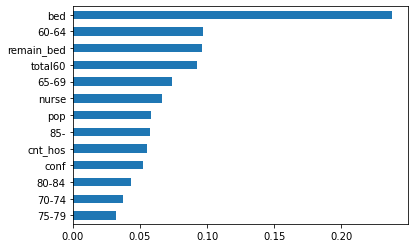

In [45]:
ax = df.plot(kind='barh',x='Feature',y='importance', legend=False)
# barh : Í∞ÄÎ°úÎßâÎåÄÌîåÎ°Ø
ax.set_ylabel('')
plt.show()

### 2-3. ÏÑ±Îä• ÌôïÏù∏

In [46]:
# train set
regressionSummary(train_y, rf.predict(train_x))


Regression statistics

                      Mean Error (ME) : 6.3006
       Root Mean Squared Error (RMSE) : 56.6546
            Mean Absolute Error (MAE) : 39.5079
          Mean Percentage Error (MPE) : -3.5765
Mean Absolute Percentage Error (MAPE) : 12.7511


In [49]:
# valid set
regressionSummary(valid_y, rf.predict(valid_x))


Regression statistics

                      Mean Error (ME) : 418.8866
       Root Mean Squared Error (RMSE) : 1091.5300
            Mean Absolute Error (MAE) : 506.7134
          Mean Percentage Error (MPE) : -58.8954
Mean Absolute Percentage Error (MAPE) : 100.4570


In [50]:
# test set
regressionSummary(test_y, rf.predict(test_x))


Regression statistics

                      Mean Error (ME) : 20.7261
       Root Mean Squared Error (RMSE) : 64.7539
            Mean Absolute Error (MAE) : 50.0350
          Mean Percentage Error (MPE) : -19.9273
Mean Absolute Percentage Error (MAPE) : 50.2694


### 2-4. ÏòàÏ∏° Ïò§Ï∞® ÏãúÍ∞ÅÌôî

In [51]:
# boxplot
pred_error_train = pd.DataFrame({ 'residual' : train_y - rf.predict(train_x),
                                  'data set' : 'training'})
pred_error_valid = pd.DataFrame({ 'residual' : valid_y - rf.predict(valid_x),
                                  'data set' : 'validation'})
pred_error_test = pd.DataFrame({ 'residual' : test_y - rf.predict(test_x),
                                  'data set' : 'test'})
boxdata_df = pred_error_train.append(pred_error_valid, ignore_index = True)
boxdata_df = boxdata_df.append(pred_error_test, ignore_index = True)
boxdata_df.tail()

residual data set
41     9.990     test
42   -77.408     test
43   -42.014     test
44    81.102     test
45    -7.080     test

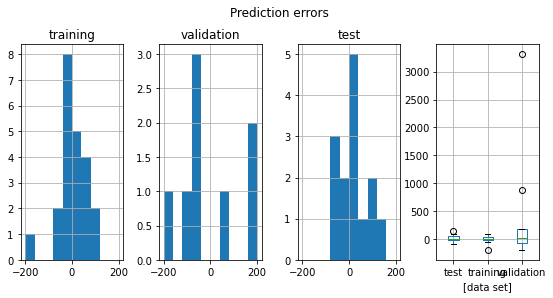

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(9,4)
common = {'bins':10, 'range':[-200, 200]} #
pred_error_train.hist(ax=axes[0], **common)
pred_error_valid.hist(ax=axes[1], **common)
pred_error_test.hist(ax=axes[2], **common)
boxdata_df.boxplot(ax=axes[3], by='data set')

axes[0].set_title('training')
axes[1].set_title('validation')
axes[2].set_title('test')
axes[3].set_title('')

plt.suptitle('Prediction errors')
plt.subplots_adjust(bottom=0.1, top=0.85, wspace=0.35)
plt.show()

## validation ÏÑ±Îä•Ïù¥ Í∞úÍµ¨Î†∑ÎçòÍ±¥ Ïù¥ÏÉÅÏπòÎïåÎß§ Í∑∏Îû´Íµ∞... Î∂ÑÌè¨ÎèÑ Ï†úÏùº ÌÅº

### 2-5. ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ï†ï

In [ ]:
# Í∞ÄÏû• Ï§ëÏöîÌïú max_features, n_estimatorsÎßå Ï°∞Ï†ïÌñàÏäµÎãàÎã§.

Storng law of large numbersÎ•º ÎßåÏ°± ÏãúÌÇ§Í∏∞ ÏúÑÌï¥ 2000Í∞ú Ïù¥ÏÉÅÏùò tree ÌïÑÏöî  
ÎÖ∏Îìú Î∂ÑÌï† Ïãú Î¨¥ÏûëÏúÑÎ°ú ÏÑ†ÌÉùÎêòÎäî Î≥ÄÏàòÏùò Ïàò > Regression = Î≥ÄÏàòÏùò Ïàò / 3  
Ï∞∏Í≥† https://youtu.be/lIT5-piVtRw   

In [53]:
# < grid search >
param_grid = {
    'n_estimators' : [1300, 1500, 1700, 2000],
    'max_features' : [2,3,4,5,6,7,8,9,10]
}
gridSearch = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_x, train_y)
print('Improved parameters : ', gridSearch.best_params_)

regTree = gridSearch.best_estimator_
regressionSummary(train_y, regTree.predict(train_x))
regressionSummary(valid_y, regTree.predict(valid_x))

Improved parameters :  {'max_features': 10, 'n_estimators': 1300}

Regression statistics

                      Mean Error (ME) : 5.7737
       Root Mean Squared Error (RMSE) : 59.0673
            Mean Absolute Error (MAE) : 40.4883
          Mean Percentage Error (MPE) : -4.1241
Mean Absolute Percentage Error (MAPE) : 13.0683

Regression statistics

                      Mean Error (ME) : 421.0550
       Root Mean Squared Error (RMSE) : 1094.2283
            Mean Absolute Error (MAE) : 506.8690
          Mean Percentage Error (MPE) : -58.8552
Mean Absolute Percentage Error (MAPE) : 100.2500


       Feature  importance
9        75-79    0.028388
0      cnt_hos    0.048012
12        conf    0.048529
8        70-74    0.050811
3        nurse    0.051904
11         85-    0.053049
10       80-84    0.058569
4          pop    0.061855
7        65-69    0.067222
2   remain_bed    0.086782
5      total60    0.102315
6        60-64    0.138660
1          bed    0.203903


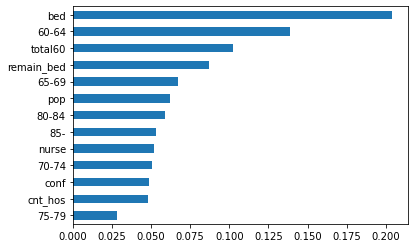

In [55]:
importances = regTree.feature_importances_
df = pd.DataFrame({'Feature':train_x.columns, 'importance':importances})
df = df.sort_values('importance')
print(df)
ax = df.plot(kind='barh',x='Feature',y='importance', legend=False)
# barh : Í∞ÄÎ°úÎßâÎåÄÌîåÎ°Ø
ax.set_ylabel('')
plt.show()

In [57]:
# ÏúÑÏóêÏÑú n_estimatorsÍ∞Ä Í∞ÄÏû• ÏûëÏùÄ 1300ÏúºÎ°ú ÏÑ†ÌÉùÎêòÏñ¥ÏÑú n_estimatorsÎ•º ÏûëÍ≤å Ï°∞Ï†ïÌïòÏó¨ Îã§Ïãú grid searchÎ•º ÏãúÌñâ
# < grid search >
param_grid = {
    'n_estimators' : [500, 700, 1000,1300],
    'max_features' : [2,3,4,5,6,7,8,9,10]
}
gridSearch = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_x, train_y)
print('Improved parameters : ', gridSearch.best_params_)
regTree_grid = gridSearch.best_estimator_
regressionSummary(train_y, regTree_grid.predict(train_x))
regressionSummary(valid_y, regTree_grid.predict(valid_x))

Improved parameters :  {'max_features': 10, 'n_estimators': 700}

Regression statistics

                      Mean Error (ME) : 4.4234
       Root Mean Squared Error (RMSE) : 58.2403
            Mean Absolute Error (MAE) : 39.7125
          Mean Percentage Error (MPE) : -4.3761
Mean Absolute Percentage Error (MAPE) : 13.3238

Regression statistics

                      Mean Error (ME) : 416.9324
       Root Mean Squared Error (RMSE) : 1088.4322
            Mean Absolute Error (MAE) : 507.2036
          Mean Percentage Error (MPE) : -60.2748
Mean Absolute Percentage Error (MAPE) : 101.7867


       Feature  importance
9        75-79    0.037031
8        70-74    0.046492
10       80-84    0.050369
0      cnt_hos    0.054032
3        nurse    0.057081
11         85-    0.058032
12        conf    0.067098
7        65-69    0.069097
4          pop    0.070634
2   remain_bed    0.087869
6        60-64    0.107455
5      total60    0.117531
1          bed    0.177278


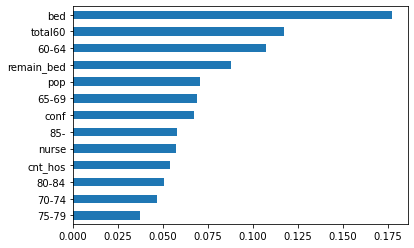

In [59]:
importances = regTree_grid.feature_importances_
df = pd.DataFrame({'Feature':train_x.columns, 'importance':importances})
df = df.sort_values('importance')
print(df)
ax = df.plot(kind='barh',x='Feature',y='importance', legend=False)
# barh : Í∞ÄÎ°úÎßâÎåÄÌîåÎ°Ø
ax.set_ylabel('')
plt.show()

In [ ]:
# ÎØ∏ÏÑ∏Ìïú Ï∞®Ïù¥ÏßÄÎßå 'max_features': 10, 'n_estimators': 700 Î™®Îç∏Ïù¥ Í∞ÄÏû• Ï¢ãÏïÑÏÑú Ïù¥Î•º Ï±ÑÌÉùÌï® (regTree_grid)

### 2-6. test ÏÑ∏Ìä∏Ïóê ÎåÄÌïú ÏµúÏ¢Ö ÏòàÏ∏° ÏÑ±Îä•

In [58]:
regressionSummary(test_y, regTree_grid.predict(test_x))


Regression statistics

                      Mean Error (ME) : 16.2912
       Root Mean Squared Error (RMSE) : 64.5175
            Mean Absolute Error (MAE) : 48.8631
          Mean Percentage Error (MPE) : -22.7503
Mean Absolute Percentage Error (MAPE) : 50.2983


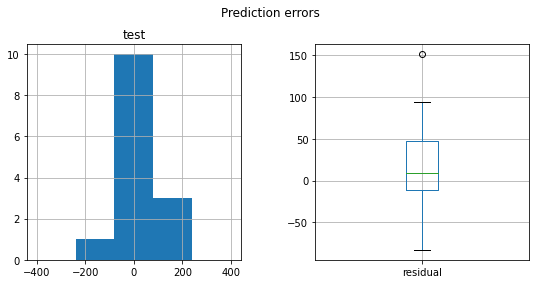

In [60]:
pred_error_test = pd.DataFrame({ 'residual' : test_y - regTree_grid.predict(test_x),
                                  'data set' : 'test'})

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(9,4)
common = {'bins':5, 'range':[-400, 400]} #
pred_error_test.hist(ax=axes[0], **common)
pred_error_test.boxplot(ax=axes[1])

axes[0].set_title('test')
axes[1].set_title('')

plt.suptitle('Prediction errors')
plt.subplots_adjust(bottom=0.1, top=0.85, wspace=0.35)
plt.show()

## [-100,100]ÏÇ¨Ïù¥Ïùò Ïò§Ï∞®Î•º Í∞ÄÏßê. Ïù¥ÏÉÅÏπòÍ∞Ä ÌïòÎÇò Ï°¥Ïû¨ÌïúÎã§.

In [120]:
test_death=[]
for i in range(0,45):
    test_death.append(regTree_grid.predict(x.loc[[i]]))
sido_death = sido
sido_death['pred_death'] = pd.DataFrame(test_death)
sido_death[['death','pred_death']]

death   pred_death
0     746   668.585714
1    1134  1183.727143
2    1203  1172.234286
3     520   603.078571
4    1243  1179.065714
5     612   586.547143
6    2002  1128.025714
7    4504  1193.610000
8      34    97.917143
9     322   509.795714
10   1312  1221.930000
11    379   577.407143
12    803   745.550000
13    158   225.181429
14    859   812.694286
15    660   681.200000
16     16    98.734286
17    649   569.957143
18    126   110.338571
19    123   133.680000
20    140   115.518571
21    185    90.822857
22    171   171.974286
23    417   265.211429
24     95    84.801429
25    563   364.165714
26    414   420.730000
27    477   466.355714
28    186   134.014286
29    323   267.804286
30     59    68.520000
31    234   204.697143
32    168    87.582857
33     72    75.477143
34     73    83.865714
35     20    98.601429
36     74    94.511429
37    359   405.665714
38     56    99.802857
39    358   197.932857
40     63    79.461429
41    208   190.744286
42    191   183.555714
43     79    83.238571
44     88    95.342857
45    149          NaN

## 3. Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Ïóê predict

### 3-1. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [99]:
pred_sido = pd.read_csv("./final_dataset/ÏãúÎèÑÎ™Ö_ÏãúÍµ∞Íµ¨Î™Ö(predict).csv").drop(columns=['Unnamed: 0'])
pred_sido.head()

ÏãúÎèÑÎ™Ö ÏãúÍµ∞Íµ¨Î™Ö  Î≥ëÏõêÏàò  Í≤©Î¶¨Î≥ëÏÉÅÏàò  ÎÇ®ÏùÄ Í≤©Î¶¨Î≥ëÏÉÅÏàò       Ï¥ùÏù∏Íµ¨  ÏöîÏñëÍ∏∞Í¥ÄÏàò  60ÏÑ∏ Ïù¥ÏÉÅ - Í≥Ñ  60~64ÏÑ∏  \
0  Í∞ïÏõêÎèÑ  Í∞ïÎ¶âÏãú  3.0   79.0      24.0  216542.0    3.0       61339   18656   
1  Í∞ïÏõêÎèÑ  ÎèôÌï¥Ïãú  2.0   66.0       1.0   87801.0    3.0       24762    7662   
2  Í∞ïÏõêÎèÑ  ÏÇºÏ≤ôÏãú  1.0   51.0       8.0   65939.0    1.0       21481    6050   
3  Í∞ïÏõêÎèÑ  ÏÜçÏ¥àÏãú  2.0  119.0       5.0   80054.0    2.0       22194    7239   
4  Í∞ïÏõêÎèÑ  ÏòÅÏõîÍµ∞  1.0   27.0       1.0   36282.0    1.0       14753    4248   

   65~69ÏÑ∏  70~74ÏÑ∏  75~79ÏÑ∏  80~84ÏÑ∏  85ÏÑ∏Ïù¥ÏÉÅ     ÌôïÏßÑÏûêÏàò  
0   13586    9988    8900    6185   4024  65832.0  
1    5655    4087    3680    2278   1400  28349.0  
2    4525    3591    3311    2377   1627  17543.0  
3    4986    3556    3055    2062   1296  27323.0  
4    3297    2309    2283    1671    945   9242.0

In [100]:
columns = ['loc_sido','loc_gun','cnt_hos','bed','remain_bed','pop','nurse','total60','60-64','65-69','70-74','75-79','80-84','85-','conf']
pred_sido.columns = columns
pred_sido

loc_sido loc_gun  cnt_hos    bed  remain_bed        pop  nurse  total60  \
0        Í∞ïÏõêÎèÑ     Í∞ïÎ¶âÏãú      3.0   79.0        24.0   216542.0    3.0    61339   
1        Í∞ïÏõêÎèÑ     ÎèôÌï¥Ïãú      2.0   66.0         1.0    87801.0    3.0    24762   
2        Í∞ïÏõêÎèÑ     ÏÇºÏ≤ôÏãú      1.0   51.0         8.0    65939.0    1.0    21481   
3        Í∞ïÏõêÎèÑ     ÏÜçÏ¥àÏãú      2.0  119.0         5.0    80054.0    2.0    22194   
4        Í∞ïÏõêÎèÑ     ÏòÅÏõîÍµ∞      1.0   27.0         1.0    36282.0    1.0    14753   
5        Í∞ïÏõêÎèÑ     ÏõêÏ£ºÏãú      3.0  131.0        23.0   352429.0    8.0    76620   
6        Í∞ïÏõêÎèÑ     Ïù∏Ï†úÍµ∞      0.0    0.0         0.0    30147.0    1.0     9039   
7        Í∞ïÏõêÎèÑ     Ï≤†ÏõêÍµ∞      1.0    1.0         0.0    43042.0    1.0    13060   
8        Í∞ïÏõêÎèÑ     Ï∂òÏ≤úÏãú      2.0   64.0        13.0   284645.0    8.0    68563   
9        Í∞ïÏõêÎèÑ     ÌèâÏ∞ΩÍµ∞      1.0    0.0         0.0    39258.0    2.0    15742   
10       Í∞ïÏõêÎèÑ     ÌôçÏ≤úÍµ∞      1.0    0.0         0.0    66587.0    3.0    24317   
11       Í∞ïÏõêÎèÑ     Ìö°ÏÑ±Íµ∞      1.0    1.0         0.0    44649.0    1.0    18100   
12       Í≤ΩÍ∏∞ÎèÑ     Í∞ÄÌèâÍµ∞      0.0    0.0         0.0    60233.0    4.0    20727   
13       Í≤ΩÍ∏∞ÎèÑ     Í≥†ÏñëÏãú      6.0  303.0        76.0  1045497.0   30.0   206667   
14       Í≤ΩÍ∏∞ÎèÑ     Í¥ëÎ™ÖÏãú      2.0   53.0         3.0   298116.0    5.0    61136   
15       Í≤ΩÍ∏∞ÎèÑ     Í¥ëÏ£ºÏãú      1.0   47.0         1.0   385141.0    6.0    75227   
16       Í≤ΩÍ∏∞ÎèÑ     Íµ¨Î¶¨Ïãú      1.0   26.0         5.0   192051.0    4.0    39356   
17       Í≤ΩÍ∏∞ÎèÑ     Íµ∞Ìè¨Ïãú      2.0   45.0        13.0   275571.0    7.0    54274   
18       Í≤ΩÍ∏∞ÎèÑ     ÍπÄÌè¨Ïãú      2.0  183.0        11.0   474546.0    6.0    81981   
19       Í≤ΩÍ∏∞ÎèÑ    ÎÇ®ÏñëÏ£ºÏãú      3.0   72.0        10.0   696033.0   16.0   139890   
20       Í≤ΩÍ∏∞ÎèÑ    ÎèôÎëêÏ≤úÏãú      0.0    0.0         0.0    95239.0    8.0    24519   
21       Í≤ΩÍ∏∞ÎèÑ     Î∂ÄÏ≤úÏãú      4.0   61.0        26.0   833148.0   23.0   170072   
22       Í≤ΩÍ∏∞ÎèÑ     ÏÑ±ÎÇ®Ïãú      6.0  153.0        49.0   922025.0   16.0   189747   
23       Í≤ΩÍ∏∞ÎèÑ     ÏàòÏõêÏãú      6.0  159.0        56.0  1210150.0   21.0   195000   
24       Í≤ΩÍ∏∞ÎèÑ     ÏãúÌù•Ïãú      3.0   75.0        13.0   535147.0   12.0    71949   
25       Í≤ΩÍ∏∞ÎèÑ     ÏïàÏÇ∞Ïãú      4.0   83.0        20.0   717345.0   17.0   110666   
26       Í≤ΩÍ∏∞ÎèÑ     ÏïàÏÑ±Ïãú      2.0    7.0         3.0   203030.0    9.0    43950   
27       Í≤ΩÍ∏∞ÎèÑ     ÏïàÏñëÏãú      2.0   28.0        14.0   542336.0    7.0   112997   
28       Í≤ΩÍ∏∞ÎèÑ     ÏñëÏ£ºÏãú      0.0    0.0         0.0   233286.0   12.0    49050   
29       Í≤ΩÍ∏∞ÎèÑ     ÏñëÌèâÍµ∞      1.0    0.0         0.0   113844.0    8.0    39331   
30       Í≤ΩÍ∏∞ÎèÑ     Ïó¨Ï£ºÏãú      1.0    8.0        11.0   113352.0    6.0    32029   
31       Í≤ΩÍ∏∞ÎèÑ     Ïó∞Ï≤úÍµ∞      1.0    1.0         0.0    42278.0    1.0    14575   
32       Í≤ΩÍ∏∞ÎèÑ     Ïò§ÏÇ∞Ïãú      1.0  100.0         9.0   240645.0    5.0    32612   
33       Í≤ΩÍ∏∞ÎèÑ     Ïö©Ïù∏Ïãú      4.0  342.0        88.0  1066975.0   23.0   193234   
34       Í≤ΩÍ∏∞ÎèÑ     ÏùòÏôïÏãú      0.0    0.0         0.0   160230.0    4.0    33625   
35       Í≤ΩÍ∏∞ÎèÑ    ÏùòÏ†ïÎ∂ÄÏãú      5.0   85.0        28.0   449572.0    8.0    97835   
36       Í≤ΩÍ∏∞ÎèÑ     Ïù¥Ï≤úÏãú      1.0   67.0         7.0   226212.0    6.0    43451   
37       Í≤ΩÍ∏∞ÎèÑ     ÌååÏ£ºÏãú      2.0    0.0         0.0   460541.0   22.0    87190   
38       Í≤ΩÍ∏∞ÎèÑ     ÌèâÌÉùÏãú      4.0   32.0        12.0   542522.0    9.0    91594   
39       Í≤ΩÍ∏∞ÎèÑ     Ìè¨Ï≤úÏãú      2.0   11.0         4.0   157939.0    5.0    40082   
40       Í≤ΩÍ∏∞ÎèÑ     ÌïòÎÇ®Ïãú      0.0    0.0         0.0   279795.0    6.0    54316   
41       Í≤ΩÍ∏∞ÎèÑ     ÌôîÏÑ±Ïãú      4.0   25.0         8.0   880859.0   12.0   110239   
42      Í≤ΩÏÉÅÎÇ®ÎèÑ     Í±∞Ï†úÏãú      3.0   52.0        25.0   246965.0    2.0    40559   
43  

In [101]:
### ÎÇ®ÏùÄ Î≥ëÏÉÅÏàòÏóê ÏùåÏàò Í∞íÏùÑ 0ÏúºÎ°ú Î≥ÄÌôò

pred_sido[pred_sido['remain_bed'] < 0]

loc_sido loc_gun  cnt_hos    bed  remain_bed       pop  nurse  total60  \
46      Í≤ΩÏÉÅÎÇ®ÎèÑ     ÎÇ®Ìï¥Íµ∞      1.0    0.0        -1.0   41587.0    1.0    19264   
134    ÏÑúÏö∏ÌäπÎ≥ÑÏãú     Ï§ëÎûëÍµ¨      3.0  208.0       -81.0  385663.0    2.0    97168   

     60-64  65-69  70-74  75-79  80-84   85-      conf  
46    4227   3698   3378   3078   2731  2152    9062.0  
134  32215  23269  17323  12806   7423  4132  130693.0

In [ ]:
#‚ùì‚ùóÔ∏è‚ùì‚ùóÔ∏è-1.0ÍπåÏßÄÎäî 0ÏúºÎ°ú Î∞îÍæ∏Í≤†ÎäîÎç∞ -81 Î®∏.Î®∏ÏûÑ...????? +81.0 Ïò§ÌÉÄÏïÑÎãàÏïº..? ÏùºÎã® 0ÏúºÎ°ú Î∞îÍæ∏Í≥† ÏßÑÌñâÌïòÍ≤†ÏäµÎãàÎã§...‚ùì‚ùóÔ∏è‚ùì‚ùóÔ∏è

In [102]:
pred_sido.loc[46,'remain_bed'] = 0
pred_sido.loc[134,'remain_bed'] = 0

In [103]:
pred_sido[pred_sido['remain_bed'] < 0] # ÏùåÏàò ÏóÜÏùå ÌôïÏù∏ 

Empty DataFrame
Columns: [loc_sido, loc_gun, cnt_hos, bed, remain_bed, pop, nurse, total60, 60-64, 65-69, 70-74, 75-79, 80-84, 85-, conf]
Index: []

### 3-2. Ïù∏Íµ¨Ïàò Î≥ÄÏàò Ïä§ÏºÄÏùºÎßÅ (transform)

In [106]:
pop_col = ['pop','total60','60-64','65-69','70-74','75-79','80-84','85-','conf']
test_scaled_pop = pd.DataFrame(scaler.transform(pred_sido[pop_col]), columns = pop_col)
test_scaled_pop.head()

pop   total60     60-64     65-69     70-74     75-79     80-84  \
0  0.173169  0.267491  0.221449  0.236584  0.267024  0.312479  0.302065   
1  0.066037  0.099850  0.084288  0.091176  0.100564  0.120264  0.102341   
2  0.047844  0.084813  0.064176  0.070458  0.086573  0.106676  0.107402   
3  0.059590  0.088080  0.079010  0.078910  0.085585  0.097249  0.091299   
4  0.023165  0.053977  0.041695  0.047944  0.050409  0.068822  0.071312   

        85-      conf  
0  0.311352  0.157017  
1  0.099037  0.065683  
2  0.117404  0.039352  
3  0.090622  0.063183  
4  0.062222  0.019125

In [109]:
sc_pred_sido = pd.concat([pred_sido.drop(columns = pop_col), test_scaled_pop], axis=1)
sc_pred_sido.head()

loc_sido loc_gun  cnt_hos    bed  remain_bed  nurse       pop   total60  \
0      Í∞ïÏõêÎèÑ     Í∞ïÎ¶âÏãú      3.0   79.0        24.0    3.0  0.173169  0.267491   
1      Í∞ïÏõêÎèÑ     ÎèôÌï¥Ïãú      2.0   66.0         1.0    3.0  0.066037  0.099850   
2      Í∞ïÏõêÎèÑ     ÏÇºÏ≤ôÏãú      1.0   51.0         8.0    1.0  0.047844  0.084813   
3      Í∞ïÏõêÎèÑ     ÏÜçÏ¥àÏãú      2.0  119.0         5.0    2.0  0.059590  0.088080   
4      Í∞ïÏõêÎèÑ     ÏòÅÏõîÍµ∞      1.0   27.0         1.0    1.0  0.023165  0.053977   

      60-64     65-69     70-74     75-79     80-84       85-      conf  
0  0.221449  0.236584  0.267024  0.312479  0.302065  0.311352  0.157017  
1  0.084288  0.091176  0.100564  0.120264  0.102341  0.099037  0.065683  
2  0.064176  0.070458  0.086573  0.106676  0.107402  0.117404  0.039352  
3  0.079010  0.078910  0.085585  0.097249  0.091299  0.090622  0.063183  
4  0.041695  0.047944  0.050409  0.068822  0.071312  0.062222  0.019125

### 3-3. Predict

In [113]:
predictors = sc_pred_sido.drop(columns=['loc_sido','loc_gun'])
predictors.head()

cnt_hos    bed  remain_bed  nurse       pop   total60     60-64     65-69  \
0      3.0   79.0        24.0    3.0  0.173169  0.267491  0.221449  0.236584   
1      2.0   66.0         1.0    3.0  0.066037  0.099850  0.084288  0.091176   
2      1.0   51.0         8.0    1.0  0.047844  0.084813  0.064176  0.070458   
3      2.0  119.0         5.0    2.0  0.059590  0.088080  0.079010  0.078910   
4      1.0   27.0         1.0    1.0  0.023165  0.053977  0.041695  0.047944   

      70-74     75-79     80-84       85-      conf  
0  0.267024  0.312479  0.302065  0.311352  0.157017  
1  0.100564  0.120264  0.102341  0.099037  0.065683  
2  0.086573  0.106676  0.107402  0.117404  0.039352  
3  0.085585  0.097249  0.091299  0.090622  0.063183  
4  0.050409  0.068822  0.071312  0.062222  0.019125

In [114]:
pred_death=[]
for i in range(0,206):
    pred_death.append(regTree_grid.predict(predictors.loc[[i]]))

In [125]:
pred_sido_death = pred_sido
pred_sido_death['pred_death'] = pd.DataFrame(pred_death)
pred_sido_death

loc_sido loc_gun  cnt_hos    bed  remain_bed        pop  nurse  total60  \
0        Í∞ïÏõêÎèÑ     Í∞ïÎ¶âÏãú      3.0   79.0        24.0   216542.0    3.0    61339   
1        Í∞ïÏõêÎèÑ     ÎèôÌï¥Ïãú      2.0   66.0         1.0    87801.0    3.0    24762   
2        Í∞ïÏõêÎèÑ     ÏÇºÏ≤ôÏãú      1.0   51.0         8.0    65939.0    1.0    21481   
3        Í∞ïÏõêÎèÑ     ÏÜçÏ¥àÏãú      2.0  119.0         5.0    80054.0    2.0    22194   
4        Í∞ïÏõêÎèÑ     ÏòÅÏõîÍµ∞      1.0   27.0         1.0    36282.0    1.0    14753   
5        Í∞ïÏõêÎèÑ     ÏõêÏ£ºÏãú      3.0  131.0        23.0   352429.0    8.0    76620   
6        Í∞ïÏõêÎèÑ     Ïù∏Ï†úÍµ∞      0.0    0.0         0.0    30147.0    1.0     9039   
7        Í∞ïÏõêÎèÑ     Ï≤†ÏõêÍµ∞      1.0    1.0         0.0    43042.0    1.0    13060   
8        Í∞ïÏõêÎèÑ     Ï∂òÏ≤úÏãú      2.0   64.0        13.0   284645.0    8.0    68563   
9        Í∞ïÏõêÎèÑ     ÌèâÏ∞ΩÍµ∞      1.0    0.0         0.0    39258.0    2.0    15742   
10       Í∞ïÏõêÎèÑ     ÌôçÏ≤úÍµ∞      1.0    0.0         0.0    66587.0    3.0    24317   
11       Í∞ïÏõêÎèÑ     Ìö°ÏÑ±Íµ∞      1.0    1.0         0.0    44649.0    1.0    18100   
12       Í≤ΩÍ∏∞ÎèÑ     Í∞ÄÌèâÍµ∞      0.0    0.0         0.0    60233.0    4.0    20727   
13       Í≤ΩÍ∏∞ÎèÑ     Í≥†ÏñëÏãú      6.0  303.0        76.0  1045497.0   30.0   206667   
14       Í≤ΩÍ∏∞ÎèÑ     Í¥ëÎ™ÖÏãú      2.0   53.0         3.0   298116.0    5.0    61136   
15       Í≤ΩÍ∏∞ÎèÑ     Í¥ëÏ£ºÏãú      1.0   47.0         1.0   385141.0    6.0    75227   
16       Í≤ΩÍ∏∞ÎèÑ     Íµ¨Î¶¨Ïãú      1.0   26.0         5.0   192051.0    4.0    39356   
17       Í≤ΩÍ∏∞ÎèÑ     Íµ∞Ìè¨Ïãú      2.0   45.0        13.0   275571.0    7.0    54274   
18       Í≤ΩÍ∏∞ÎèÑ     ÍπÄÌè¨Ïãú      2.0  183.0        11.0   474546.0    6.0    81981   
19       Í≤ΩÍ∏∞ÎèÑ    ÎÇ®ÏñëÏ£ºÏãú      3.0   72.0        10.0   696033.0   16.0   139890   
20       Í≤ΩÍ∏∞ÎèÑ    ÎèôÎëêÏ≤úÏãú      0.0    0.0         0.0    95239.0    8.0    24519   
21       Í≤ΩÍ∏∞ÎèÑ     Î∂ÄÏ≤úÏãú      4.0   61.0        26.0   833148.0   23.0   170072   
22       Í≤ΩÍ∏∞ÎèÑ     ÏÑ±ÎÇ®Ïãú      6.0  153.0        49.0   922025.0   16.0   189747   
23       Í≤ΩÍ∏∞ÎèÑ     ÏàòÏõêÏãú      6.0  159.0        56.0  1210150.0   21.0   195000   
24       Í≤ΩÍ∏∞ÎèÑ     ÏãúÌù•Ïãú      3.0   75.0        13.0   535147.0   12.0    71949   
25       Í≤ΩÍ∏∞ÎèÑ     ÏïàÏÇ∞Ïãú      4.0   83.0        20.0   717345.0   17.0   110666   
26       Í≤ΩÍ∏∞ÎèÑ     ÏïàÏÑ±Ïãú      2.0    7.0         3.0   203030.0    9.0    43950   
27       Í≤ΩÍ∏∞ÎèÑ     ÏïàÏñëÏãú      2.0   28.0        14.0   542336.0    7.0   112997   
28       Í≤ΩÍ∏∞ÎèÑ     ÏñëÏ£ºÏãú      0.0    0.0         0.0   233286.0   12.0    49050   
29       Í≤ΩÍ∏∞ÎèÑ     ÏñëÌèâÍµ∞      1.0    0.0         0.0   113844.0    8.0    39331   
30       Í≤ΩÍ∏∞ÎèÑ     Ïó¨Ï£ºÏãú      1.0    8.0        11.0   113352.0    6.0    32029   
31       Í≤ΩÍ∏∞ÎèÑ     Ïó∞Ï≤úÍµ∞      1.0    1.0         0.0    42278.0    1.0    14575   
32       Í≤ΩÍ∏∞ÎèÑ     Ïò§ÏÇ∞Ïãú      1.0  100.0         9.0   240645.0    5.0    32612   
33       Í≤ΩÍ∏∞ÎèÑ     Ïö©Ïù∏Ïãú      4.0  342.0        88.0  1066975.0   23.0   193234   
34       Í≤ΩÍ∏∞ÎèÑ     ÏùòÏôïÏãú      0.0    0.0         0.0   160230.0    4.0    33625   
35       Í≤ΩÍ∏∞ÎèÑ    ÏùòÏ†ïÎ∂ÄÏãú      5.0   85.0        28.0   449572.0    8.0    97835   
36       Í≤ΩÍ∏∞ÎèÑ     Ïù¥Ï≤úÏãú      1.0   67.0         7.0   226212.0    6.0    43451   
37       Í≤ΩÍ∏∞ÎèÑ     ÌååÏ£ºÏãú      2.0    0.0         0.0   460541.0   22.0    87190   
38       Í≤ΩÍ∏∞ÎèÑ     ÌèâÌÉùÏãú      4.0   32.0        12.0   542522.0    9.0    91594   
39       Í≤ΩÍ∏∞ÎèÑ     Ìè¨Ï≤úÏãú      2.0   11.0         4.0   157939.0    5.0    40082   
40       Í≤ΩÍ∏∞ÎèÑ     ÌïòÎÇ®Ïãú      0.0    0.0         0.0   279795.0    6.0    54316   
41       Í≤ΩÍ∏∞ÎèÑ     ÌôîÏÑ±Ïãú      4.0   25.0         8.0   880859.0   12.0   110239   
42      Í≤ΩÏÉÅÎÇ®ÎèÑ     Í±∞Ï†úÏãú      3.0   52.0        25.0   246965.0    2.0    40559   
43  

In [116]:
pred_sido_death.to_csv("./final_dataset/ÎûúÎç§Ìè¨Î†àÏä§Ìä∏_ÏòàÏ∏°Í≤∞Í≥º_ÏµúÏ¢Ö_ÌîºÎìúÎ∞±Î∞òÏòÅ.csv")

### +) Ï∂îÍ∞Äüíú
**ÏÑ∏Î∂ÑÏù¥ÏÑú Í∞ÅÍ∞Å ÏßÑÌñâÌïú Î™®Îç∏ Î≥ÑÎ°ú ÏãúÍµ∞Íµ¨Î≥ÑÎ°ú ÏòàÏ∏°Îêú ÏÇ¨ÎßùÏûêÏàòÎ•º ÎèÑ Îã®ÏúÑÎ°ú Ìï©Ï≥êÏÑú ÏõêÎûò Îç∞Ïù¥ÌÑ∞Ïùò ÏÇ¨ÎßùÏûê ÏàòÎûë ÌïúÎ≤à ÎπÑÍµêÌï¥Î≥¥ÏÑ∏Ïöî.**

In [133]:
pred_sum = pred_sido_death.groupby('loc_sido', as_index=False).sum()
pred_sum

loc_sido  cnt_hos     bed  remain_bed         pop  nurse  total60   60-64  \
0       Í∞ïÏõêÎèÑ     18.0   539.0        75.0   1347375.0   34.0   369970  116558   
1       Í≤ΩÍ∏∞ÎèÑ     70.0  1966.0       467.0  13453658.0  318.0  2517321  878926   
2      Í≤ΩÏÉÅÎÇ®ÎèÑ     35.0   940.0       177.0   3295942.0  129.0   774696  253193   
3      Í≤ΩÏÉÅÎ∂ÅÎèÑ     29.0  1046.0       271.0   2583157.0  111.0   719154  213011   
4     Í¥ëÏ£ºÍ¥ëÏó≠Ïãú     19.0   240.0        55.0   1477573.0   60.0   290547   96662   
5     ÎåÄÍµ¨Í¥ëÏó≠Ïãú     18.0   876.0       249.0   2410700.0   75.0   559877  182705   
6     ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú     10.0   325.0        80.0   1488435.0   47.0   299964  102881   
7     Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú     28.0   679.0       188.0   3212282.0  169.0   869020  278378   
8     ÏÑúÏö∏ÌäπÎ≥ÑÏãú     47.0  2150.0       442.0   9231569.0  125.0  2045748  654912   
9   ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú      2.0    32.0         9.0    353933.0    5.0    48720   16969   
10    Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú      7.0   229.0        49.0   1135423.0   40.0   218134   84906   
11    Ïù∏Ï≤úÍ¥ëÏó≠Ïãú     17.0   993.0       197.0   2864877.0   68.0   571870  208179   
12     Ï†ÑÎùºÎÇ®ÎèÑ     35.0   497.0       124.0   1740538.0   83.0   517976  139367   
13     Ï†ÑÎùºÎ∂ÅÎèÑ     17.0   568.0       137.0   1735829.0   84.0   463566  131944   
14  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ      5.0   170.0        42.0    492306.0   10.0    96682   31190   
15     Ï∂©Ï≤≠ÎÇ®ÎèÑ     16.0   585.0        57.0   2098798.0   67.0   496840  144876   
16     Ï∂©Ï≤≠Î∂ÅÎèÑ     14.0   696.0       100.0   1593995.0   41.0   374360  119893   

     65-69   70-74   75-79   80-84     85-       conf    pred_death  
0    81374   56864   53119   38211   23844   440985.0   4532.135714  
1   572377  412064  314849  207567  131538  4800166.0  19171.345714  
2   179622  128375   99667   70217   43622  1052389.0   7717.175714  
3   162533  119640  100383   75400   48187   731978.0   8439.180000  
4    65287   52134   38610   23826   14028   518968.0   3143.214286  
5   133421   95965   73211   47435   27140   734292.0   5155.671429  
6    70114   50097   37683   24168   15021   496421.0   3145.061429  
7   214341  157522  114719   68256   35804  1026370.0   8891.904286  
8   485063  369940  272798  163781   99254  3391551.0  17480.757143  
9    11421    7769    5719    3938    2904   134571.0    606.940000  
10   55024   34583   22620   13350    7651   366309.0   2643.124286  
11  131021   93415   67489   43390   28376  1019114.0   5387.415714  
12  105140   92250   81021   60987   39211   565343.0   7026.278571  
13   99136   84540   67092   48283   32571   564574.0   4904.301429  
14   21025   16203   12577    8992    6695   173609.0    799.531429  
15  105977   83977   69389   54360   38261   674023.0   5955.827143  
16   83793   58316   51431   37148   23779   529385.0   3596.388571

In [166]:
real_death = sido[['loc','death']].iloc[0:16]
real_death

loc  death
0       Í∞ïÏõêÎèÑ    746
1      Í≤ΩÏÉÅÎÇ®ÎèÑ   1134
2      Í≤ΩÏÉÅÎ∂ÅÎèÑ   1203
3     Í¥ëÏ£ºÍ¥ëÏó≠Ïãú    520
4     ÎåÄÍµ¨Í¥ëÏó≠Ïãú   1243
5     ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú    612
6     Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú   2002
7     ÏÑúÏö∏ÌäπÎ≥ÑÏãú   4504
8   ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú     34
9     Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú    322
10    Ïù∏Ï≤úÍ¥ëÏó≠Ïãú   1312
11     Ï†ÑÎùºÎÇ®ÎèÑ    379
12     Ï†ÑÎùºÎ∂ÅÎèÑ    803
13  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ    158
14     Ï∂©Ï≤≠ÎÇ®ÎèÑ    859
15     Ï∂©Ï≤≠Î∂ÅÎèÑ    660

In [170]:
pred_death = pred_sum[['loc_sido','pred_death']].rename(columns = {'loc_sido':'loc'})
pred_death

loc    pred_death
0       Í∞ïÏõêÎèÑ   4532.135714
1       Í≤ΩÍ∏∞ÎèÑ  19171.345714
2      Í≤ΩÏÉÅÎÇ®ÎèÑ   7717.175714
3      Í≤ΩÏÉÅÎ∂ÅÎèÑ   8439.180000
4     Í¥ëÏ£ºÍ¥ëÏó≠Ïãú   3143.214286
5     ÎåÄÍµ¨Í¥ëÏó≠Ïãú   5155.671429
6     ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú   3145.061429
7     Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú   8891.904286
8     ÏÑúÏö∏ÌäπÎ≥ÑÏãú  17480.757143
9   ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú    606.940000
10    Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú   2643.124286
11    Ïù∏Ï≤úÍ¥ëÏó≠Ïãú   5387.415714
12     Ï†ÑÎùºÎÇ®ÎèÑ   7026.278571
13     Ï†ÑÎùºÎ∂ÅÎèÑ   4904.301429
14  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ    799.531429
15     Ï∂©Ï≤≠ÎÇ®ÎèÑ   5955.827143
16     Ï∂©Ï≤≠Î∂ÅÎèÑ   3596.388571

In [171]:
# ÎπÑÍµê Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÎßåÎì§Í∏∞

compare_death = pd.merge(real_death, pred_death)
compare_death

loc  death    pred_death
0       Í∞ïÏõêÎèÑ    746   4532.135714
1      Í≤ΩÏÉÅÎÇ®ÎèÑ   1134   7717.175714
2      Í≤ΩÏÉÅÎ∂ÅÎèÑ   1203   8439.180000
3     Í¥ëÏ£ºÍ¥ëÏó≠Ïãú    520   3143.214286
4     ÎåÄÍµ¨Í¥ëÏó≠Ïãú   1243   5155.671429
5     ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú    612   3145.061429
6     Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú   2002   8891.904286
7     ÏÑúÏö∏ÌäπÎ≥ÑÏãú   4504  17480.757143
8   ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú     34    606.940000
9     Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú    322   2643.124286
10    Ïù∏Ï≤úÍ¥ëÏó≠Ïãú   1312   5387.415714
11     Ï†ÑÎùºÎÇ®ÎèÑ    379   7026.278571
12     Ï†ÑÎùºÎ∂ÅÎèÑ    803   4904.301429
13  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ    158    799.531429
14     Ï∂©Ï≤≠ÎÇ®ÎèÑ    859   5955.827143
15     Ï∂©Ï≤≠Î∂ÅÎèÑ    660   3596.388571